## Week 2 - assignment
_Freek Plak - 19 November 2020_

This weeks assignment with comments in between explaining what we are doing and why. 
The assignment:

`Make a Notebook with the following elements. Please add sufficient comments: not just explaining what you are doing, but why you are doing it. Tip: copy and adapt last week's assignment.`

`- Your data pre-processing steps`

`- Create the variable mean steps per participant. Hint: combine Pandas .loc and .mean() with the right axis argument (axis=....) for mean(). Look up the documentation of .loc and Pandas .mean() if you're unsure.`

`- The head() of the resulting data frame`

`- The relation of meansteps per participant with at least 2 other quantitative variables (e.g., how are steps related to weight, height).`

`   o Correlation matrix including all 3 variables`
    
`   o Scatter plots of your variable with the 2 other variables (2 scatter plots in total)`
    
`   o Pearson’s correlation for the 2 relations`
    
`   o Verbal description of the relations, including strength of the association, linearity, etc.`
    
`- The relation of mean steps per participant with a qualitative variable with two levels (e.g. gender, weekday vs weekend)`

`   o Graphs of the relation (e.g. histogram, violin plot, bar plot)`
    
`   o Verbal description of the relation`
    
`- The relation between two qualitative variables`

`   o Graphs of the relation (e.g., bar plot)`
    
`   o Cross table with relevant percentages`
    
`   o Verbal description of the relation`
   

## Import + function

Import the stuff we need and define some cleaning data functions we will be using.

In [230]:
import seaborn as sns #this is the plotting library I'll be using 
import pandas as pd #"as pd" means that we can use the abbreviation in commands
import matplotlib.pyplot as plt #we need Matplotlib for setting the labels in the Seaborn graphs
import numpy as np
from scipy.stats.stats import pearsonr #We will need the correlation function from the scientific package scipy
import datetime

#To remove the values above 180 kg and below 50 kg, we need to create a function that we then apply to the entire column
def clean_weight(x):
    if(x < 120.0 and x > 50.0): 
        return x
    else: 
        return float('NaN')
def clean_mean_steps(x):
    if(x > 100.0 and x < 17500.0):
        return x
    else:
        return float('NaN')

## Create dataframe

Create the first dataframe we need to with mean steps per participant and merge it with survey data. Clean the data with the functions. Display the head of the resulting dataframe.

In [231]:
df1 = pd.read_csv('steps.csv', sep=';')
df1['mean_steps'] = df1.iloc[:, 1:].mean(axis=1) #get average steps 
df1.drop(df1.columns[1:329], axis = 1, inplace = True) #drop all columns with dates and keep id + mean_steps
df2 = pd.read_csv('survey.csv') #import survey data
df = pd.merge(df1, df2, on = 'id') #merge dataframes, 'id' is the common identifier
df['weight'] = df['weight'].apply(clean_weight) #clean weight values with function
df['mean_steps'] = df['mean_steps'].apply(clean_mean_steps) #clean weight values with function
df.head()

,id,mean_steps,city,gender,age,hh_size,education,education_1,height,weight
0,1,10205.521212,Bordeaux,Male,25-34,4,4,Master or doctorate,178.0,98.0
1,2,5687.423313,Lille,Male,35-44,1,3,Bachelor,180.0,77.0
2,3,8301.729730,Montpellier,Male,25-34,2,2,Master or doctorate,180.0,83.0
3,4,3633.200000,Lyon,Male,<25,1,1,Bachelor,178.0,80.0
4,5,5312.129630,Montpellier,Female,25-34,3,4,Bachelor,167.0,61.0


## Relation of meansteps and 2 other quantitative variables

Chose height and weight as the other variables. And started with a correlation matrix including all three variables.

In [232]:
corr = df[['height', 'weight', 'mean_steps']].corr() 
corr

,height,weight,mean_steps
height,1.000000,0.561201,-0.083501
weight,0.561201,1.000000,-0.078494
mean_steps,-0.083501,-0.078494,1.000000


Scatter plots of your variable with the 2 other variables (2 scatter plots in total)

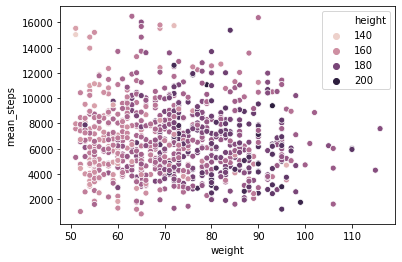

In [233]:
sns.scatterplot(data=df, x="weight", y="mean_steps", hue="height")

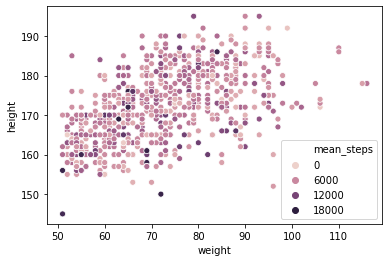

In [234]:
sns.scatterplot(data=df, x="weight", y="height", hue="mean_steps")

Nice extra plot with an average line in there

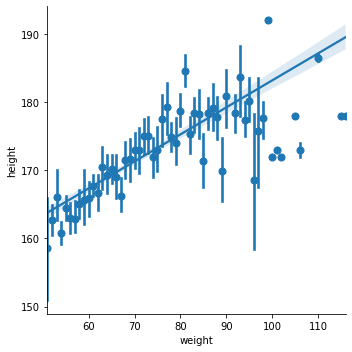

In [236]:
sns.lmplot(x="weight", y="height", data=df, x_estimator=np.mean)

Calculate pearson's r for this and a verbal discription below

In [237]:
df_subset = df[['weight', 'height', 'mean_steps']] #getting a subset that's enough for this part
df_subset = df_subset.dropna() #scipy can't deal with NaN values so have to drop those
print(pearsonr(df_subset['weight'],df_subset['mean_steps']))
print(pearsonr(df_subset['weight'],df_subset['height']))

(-0.07799890852041333, 0.022086945582548544)
(0.5642520002691558, 1.5438736589396944e-73)


__Verbal discription__

There is a very low correlation between weight and mean steps, there is however a moderate correlation between weight and height. Evidence is however quite low as the s value is not close to 0. Don't know what to say about linearity yet.

## The relation of mean steps per participant with a qualitative variable with two levels

Tried to go with the weekday vs weekend. had some problems in how to make that. So just made a new dataframe that calculated averages in weekday and weekend. Ended up putting this in bar charts. Hopefully you can provide me with some specific feedback on this part.

Created the new df1 from file again, two new dataframes I filled with the right columns using a for loop going over the initial data in columns. Then retrieving the mean for both of these dataframes, dropping the used columns with dates and merging them with the earlier dataframe to create the df with mean, mean in weekday and mean in weekend day. With the result shown as .head() of the table.

In [238]:
df1 = pd.read_csv('steps.csv', sep=';')
df_weekday = pd.DataFrame(df1["id"])
df_weekend_day = pd.DataFrame(df1["id"])
for key, value in df1.iteritems(): 
    datelist = key.split('-')
    if len(datelist) == 3:
        year = int(datelist[2])
        month = int(datelist[1])
        day = int(datelist[0])
        weekno = datetime.datetime(year,month,day).weekday()
        if weekno < 5:
            df_weekday[key] = value
        else:
            df_weekend_day[key] = value
    else: 
        pass

df_weekday['mean_weekday'] = df_weekday.iloc[:, 1:].mean(axis=1) #get average steps 
df_weekday.drop(df_weekday.columns[1:235], axis = 1, inplace = True) #drop all columns with dates and keep id + mean_steps
df_weekend_day['mean_weekend_day'] = df_weekend_day.iloc[:, 1:].mean(axis=1) #get average steps 
df_weekend_day.drop(df_weekend_day.columns[1:95], axis = 1, inplace = True) #drop all columns with dates and keep id + mean_steps
df_new_set = pd.merge(df, df_weekday, on = 'id') #merge dataframes, 'id' is the common identifier
df_new_set = pd.merge(df_new_set, df_weekend_day, on = 'id') #merge dataframes, 'id' is the common identifier
df_new_set.head()

,id,mean_steps,city,gender,age,hh_size,education,education_1,height,weight,mean_weekday,mean_weekend_day
0,1,10205.521212,Bordeaux,Male,25-34,4,4,Master or doctorate,178.0,98.0,9875.681034,10986.367347
1,2,5687.423313,Lille,Male,35-44,1,3,Bachelor,180.0,77.0,5963.111111,4986.217391
2,3,8301.729730,Montpellier,Male,25-34,2,2,Master or doctorate,180.0,83.0,8257.960784,8398.782609
3,4,3633.200000,Lyon,Male,<25,1,1,Bachelor,178.0,80.0,2953.312500,6352.750000
4,5,5312.129630,Montpellier,Female,25-34,3,4,Bachelor,167.0,61.0,5271.926829,5438.923077



Had some difficulties here as well needed to use pd.melt to combine everything in a double bar chart. But happy with the result.


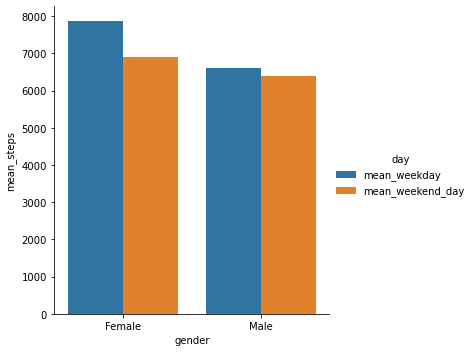

In [210]:
df_plot = df_new_set.drop(['id', 'mean_steps', 'city', 'age', 'hh_size', 'education', 'education_1', 'height', 'weight'], axis=1)
df_plot = df_plot.groupby('gender').mean()
df_plot = df_plot.reset_index()
df_plot = pd.melt(df_plot, id_vars="gender", var_name="day", value_name="mean_steps")
#df_plot.head()
sns.catplot(x='gender', y='mean_steps', hue='day', data=df_plot, kind='bar')

And a bonus violinplot between gender and mean_steps, if I did the top part wrong this is at least correct enough for the assignment. And a verbal discription below.

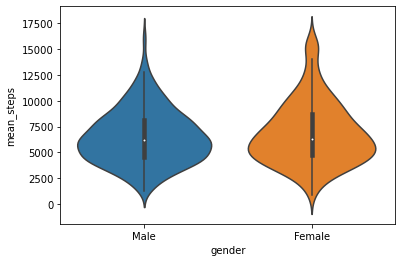

In [239]:
ax = sns.violinplot(x="gender", y="mean_steps", data=df)

__Verbal discription__

Both males and females are making the most steps during weekday's, the difference is smaller for males than females. Males make on average less steps than females but that is mostly because there are less males with high averages, females have a bit more differentiation in amount of average steps. The mode of males and females is around the same average number.

## The relation between two qualitative variables

Chose to do it between education and city. First the bar plot.

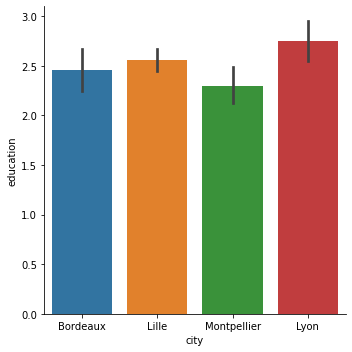

In [228]:
sns.catplot(x='city', y='education', data=df, kind='bar')

Second a cross table with the relevant percentages. Couldn't use normalize as the total amounts per city differ. So calculated it using .apply to apply it to the results. Verbal discription at the end.

In [240]:
pd.crosstab(df.city, df.education).apply(lambda r: (r/r.sum())*100, axis=1)

education,1,2,3,4,5
city,,,,,
Bordeaux,27.906977,34.883721,4.651163,28.682171,3.875969
Lille,24.356436,36.435644,3.366337,30.693069,5.148515
Lyon,19.718310,33.098592,2.112676,42.957746,2.112676
Montpellier,30.718954,37.254902,6.535948,22.222222,3.267974


__Verbal discription__

On average all cities are around the 2.5 in education which is a bit below the middle of the 1 to 5 scale. The cross table shows that there are only a small amount of people with an education in the level of 4 and 5. The change to run in to somebody that is higher educated (defined as level 4 and 5) is almost double in Lyon compared to Montpellier. 

People with a higher education likely live in cities starting with an "L". But guess we have not enough data to support that claim :D.